In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import sys
sys.path.append('../')
import gp

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/miniconda2/envs/NP/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
e_p = []
p = []

In [3]:
import cPickle as pickle
with open('../nets/IPMLB_FULL_CREMI_FINAL.p', 'rb') as f:
    cnn = pickle.load(f)
cnn.uuid = 'IPMLB'

In [3]:
# here we just load p, and e_p
import cPickle as pickle
with open('/home/d/CREMIBIG/test_e_p.p', 'rb') as f:
    e_p = pickle.load(f)
    
with open('/home/d/CREMIBIG/test_p.p', 'rb') as f:
    p = pickle.load(f)




In [ ]:
#
# FOCUSED PROOFREADING
#

In [2]:
# cconvert to FP format with target
import neuroproof
import neuroproof.FocusedProofreading as fp


In [4]:
graphs = []
for z in range(0,75):
    
    g = fp.Graph('/home/d/FP/CREMITESTBIG/graph_'+str(z)+'.json')
    graphs.append(g)

In [10]:
fp_y_test_proba = []
fp_y_test = []
gt_y_test = []

z = 0
j = 0
for i in range(len(e_p)):
    
    cur_e_p = e_p[i]
    cur_p = p[i]
    
    
    # find z
    if j >= patches_per_slice[z]:
        # next slice
        z += 1
        j = 0
        print 'next slice'
        
    
    g = graphs[z]
    
#     for pa in cur_e_p:
#         print pa['l'], pa['n']

    pa = cur_e_p

    label1 = pa['l']
    label2 = pa['n']
    

    graph_neighbors = sorted(g.find_close_bodies(label1,0,0.))

    pred = [ne[1] for ne in graph_neighbors if ne[0] == label2]

    fp_y_test.append(np.round(pred))
    fp_y_test_proba.append(pred)
    gt_y_test.append(1)
        
        
        
        
#     for pa in cur_p:
#         print pa['l'], pa['n']

    pa = cur_p

    label1 = pa['l']
    label2 = pa['n']

    graph_neighbors = sorted(g.find_close_bodies(label1,0,0.))

    pred = [ne[1] for ne in graph_neighbors if ne[0] == label2]

    fp_y_test.append(np.round(pred))
    fp_y_test_proba.append(pred)
    gt_y_test.append(0)
        
    #print z

    j += 1



next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice
next slice


In [11]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support, f1_score, precision_recall_curve, average_precision_score, zero_one_loss


In [12]:
print 'Precision/Recall:'
print classification_report(np.array(gt_y_test), np.array(fp_y_test))

Precision/Recall:
             precision    recall  f1-score   support

          0       0.50      1.00      0.67     39896
          1       0.74      0.00      0.00     39896

avg / total       0.62      0.50      0.33     79792



In [13]:
acc_score = accuracy_score(np.array(gt_y_test), np.array(fp_y_test))
print 'Accuracy Score:', acc_score

Accuracy Score: 0.500325847203


In [14]:
with open('/home/d/CREMIBIG/fp_y_test_proba.p','wb') as f:
    pickle.dump(fp_y_test_proba, f)
print 'stored'

stored


In [30]:
len(e_p)

39896

In [ ]:
#
# GUIDED PROOFREADING
#

In [22]:
gp_y_test_proba = []
gp_y_test = []
gt_y_test = []
for z in range(len(e_p)):
    
    cur_e_p = e_p[z]
    cur_p = p[z]
    
    pa = cur_e_p
        
    label1 = pa['l']
    label2 = pa['n']
    pa['prob'] = 1.-pa['prob']
    pred = gp.Patch.test_and_unify([pa], cnn)

    gp_y_test.append(np.round(pred))
    gp_y_test_proba.append(pred)
    gt_y_test.append(1)

    pa = cur_p
    
    label1 = pa['l']
    label2 = pa['n']
    pa['prob'] = 1.-pa['prob']
    pred = gp.Patch.test_and_unify([pa], cnn)        

    gp_y_test.append(np.round(pred))
    gp_y_test_proba.append(pred)
    gt_y_test.append(0)
        
    if z % 1000 == 0:
        print z

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000


In [23]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support, f1_score, precision_recall_curve, average_precision_score, zero_one_loss


In [24]:
print classification_report(np.array(gt_y_test), np.array(gp_y_test))

             precision    recall  f1-score   support

          0       0.91      0.81      0.86     39896
          1       0.83      0.92      0.87     39896

avg / total       0.87      0.87      0.86     79792



In [25]:
acc_score = accuracy_score(np.array(gt_y_test), np.array(gp_y_test))
print 'Accuracy Score:', acc_score

Accuracy Score: 0.86512432324


In [26]:
with open('/home/d/CREMIBIG/gp_y_test_proba.p','wb') as f:
    pickle.dump(gp_y_test_proba, f)

In [27]:
with open('/home/d/CREMIBIG/gt_y_test.p','wb') as f:
    pickle.dump(gt_y_test, f)

In [ ]:
#
# combined plots
#


In [15]:
# load fp and gp
with open('/home/d/CREMIBIG/gp_y_test_proba.p', 'rb') as f:
    gp_y_test_proba = pickle.load(f)
with open('/home/d/CREMIBIG/fp_y_test_proba.p', 'rb') as f:
    fp_y_test_proba = pickle.load(f)
with open('/home/d/CREMIBIG/gt_y_test.p', 'rb') as f:
    gt_y_test = pickle.load(f)

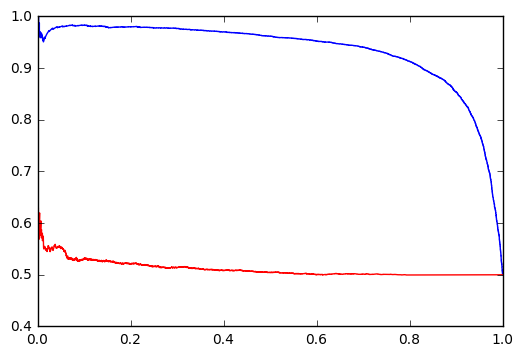

In [16]:
gp_precision, gp_recall, gp_thresholds = precision_recall_curve(gt_y_test, gp_y_test_proba, pos_label=1)
fp_precision, fp_recall, fp_thresholds = precision_recall_curve(gt_y_test, fp_y_test_proba, pos_label=1)
plt.plot(gp_recall, gp_precision, color='blue')
plt.plot(fp_recall, fp_precision, color='red')

In [20]:
fp_y_test_proba[0:20]

[[0.8196078389883041],
 [0.8196078389883041],
 [0.5511418576822149],
 [0.5511418576822149],
 [0.7098039090633392],
 [0.7098039090633392],
 [0.5511418576822149],
 [0.5511418576822149],
 [0.3513725279943616],
 [0.3513725279943616],
 [0.7411764562129974],
 [0.7411764562129974],
 [0.8784313723444939],
 [0.8784313723444939],
 [0.3647058606147766],
 [0.3647058606147766],
 [0.37647056579589844],
 [0.37647056579589844],
 [0.4470587968826294],
 [0.4470587968826294]]

In [29]:
gt_y_test[0:20]

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [28]:
gp_y_test_proba[0:20]

[5.430905002867803e-05,
 0.014433564618229866,
 0.75495779514312744,
 0.014433564618229866,
 0.96915876865386963,
 0.050547275692224503,
 0.96915876865386963,
 0.050547275692224503,
 0.96799391508102417,
 0.0068419207818806171,
 0.96799391508102417,
 0.0068419207818806171,
 0.93709903955459595,
 0.81448686122894287,
 0.93709903955459595,
 0.81448686122894287,
 0.60147333145141602,
 0.01183809619396925,
 0.60147333145141602,
 0.01183809619396925]

In [5]:
aaa='''
working on slice 0
no mask
Generated 864 split error patches and 864  correct patches in 88.7517929077 seconds.
working on slice 1
no mask
Generated 644 split error patches and 644  correct patches in 77.0009469986 seconds.
working on slice 2
no mask
Generated 412 split error patches and 412  correct patches in 64.2233221531 seconds.
working on slice 3
no mask
Generated 408 split error patches and 408  correct patches in 60.1068799496 seconds.
working on slice 4
no mask
Generated 392 split error patches and 392  correct patches in 61.5711750984 seconds.
working on slice 5
no mask
Generated 456 split error patches and 456  correct patches in 67.9314539433 seconds.
working on slice 6
no mask
Generated 584 split error patches and 584  correct patches in 72.199368 seconds.
working on slice 7
no mask
Generated 516 split error patches and 516  correct patches in 74.4610579014 seconds.
working on slice 8
no mask
Generated 600 split error patches and 600  correct patches in 79.8463599682 seconds.
working on slice 9
no mask
Generated 536 split error patches and 536  correct patches in 73.4399859905 seconds.
working on slice 10
no mask
Generated 660 split error patches and 660  correct patches in 80.8224570751 seconds.
working on slice 11
no mask
Generated 516 split error patches and 516  correct patches in 73.8577289581 seconds.
working on slice 12
no mask
Generated 568 split error patches and 568  correct patches in 72.4297659397 seconds.
working on slice 13
no mask
Generated 748 split error patches and 748  correct patches in 81.5840780735 seconds.
working on slice 14
no mask
Generated 548 split error patches and 548  correct patches in 72.7623548508 seconds.
working on slice 15
no mask
Generated 440 split error patches and 440  correct patches in 65.453111887 seconds.
working on slice 16
no mask
Generated 448 split error patches and 448  correct patches in 67.6617920399 seconds.
working on slice 17
no mask
Generated 676 split error patches and 676  correct patches in 78.8249759674 seconds.
working on slice 18
no mask
Generated 712 split error patches and 712  correct patches in 81.3622560501 seconds.
working on slice 19
no mask
Generated 588 split error patches and 588  correct patches in 76.3714969158 seconds.
working on slice 20
no mask
Generated 640 split error patches and 640  correct patches in 75.4619441032 seconds.
working on slice 21
no mask
Generated 568 split error patches and 568  correct patches in 75.369535923 seconds.
working on slice 22
no mask
Generated 564 split error patches and 564  correct patches in 74.2786240578 seconds.
working on slice 23
no mask
Generated 620 split error patches and 620  correct patches in 76.340389967 seconds.
working on slice 24
no mask
Generated 412 split error patches and 412  correct patches in 64.9502279758 seconds.
working on slice 25
no mask
Generated 560 split error patches and 560  correct patches in 49.6370921135 seconds.
working on slice 26
no mask
Generated 456 split error patches and 456  correct patches in 45.1472828388 seconds.
working on slice 27
no mask
Generated 432 split error patches and 432  correct patches in 45.1168401241 seconds.
working on slice 28
no mask
Generated 444 split error patches and 444  correct patches in 43.5215339661 seconds.
working on slice 29
no mask
Generated 588 split error patches and 588  correct patches in 48.6778891087 seconds.
working on slice 30
no mask
Generated 496 split error patches and 496  correct patches in 49.1675620079 seconds.
working on slice 31
no mask
Generated 520 split error patches and 520  correct patches in 42.579144001 seconds.
working on slice 32
no mask
Generated 452 split error patches and 452  correct patches in 35.224063158 seconds.
working on slice 33
no mask
Generated 372 split error patches and 372  correct patches in 31.4410500526 seconds.
working on slice 34
no mask
Generated 428 split error patches and 428  correct patches in 35.9716060162 seconds.
working on slice 35
no mask
Generated 400 split error patches and 400  correct patches in 37.2554290295 seconds.
working on slice 36
no mask
Generated 372 split error patches and 372  correct patches in 35.0172948837 seconds.
working on slice 37
no mask
Generated 412 split error patches and 412  correct patches in 35.0888030529 seconds.
working on slice 38
no mask
Generated 324 split error patches and 324  correct patches in 32.1475739479 seconds.
working on slice 39
no mask
Generated 292 split error patches and 292  correct patches in 33.4721031189 seconds.
working on slice 40
no mask
Generated 292 split error patches and 292  correct patches in 32.145138979 seconds.
working on slice 41
no mask
Generated 356 split error patches and 356  correct patches in 37.1747980118 seconds.
working on slice 42
no mask
Generated 432 split error patches and 432  correct patches in 39.0164089203 seconds.
working on slice 43
no mask
Generated 408 split error patches and 408  correct patches in 37.8132679462 seconds.
working on slice 44
no mask
Generated 412 split error patches and 412  correct patches in 34.8254818916 seconds.
working on slice 45
no mask
Generated 412 split error patches and 412  correct patches in 36.1974160671 seconds.
working on slice 46
no mask
Generated 396 split error patches and 396  correct patches in 34.8207061291 seconds.
working on slice 47
no mask
Generated 332 split error patches and 332  correct patches in 29.9883439541 seconds.
working on slice 48
no mask
Generated 304 split error patches and 304  correct patches in 27.8007190228 seconds.
working on slice 49
no mask
Generated 260 split error patches and 260  correct patches in 25.1326870918 seconds.
working on slice 50
no mask
Generated 656 split error patches and 656  correct patches in 67.8867759705 seconds.
working on slice 51
no mask
Generated 708 split error patches and 708  correct patches in 64.5013170242 seconds.
working on slice 52
no mask
Generated 520 split error patches and 520  correct patches in 59.3628590107 seconds.
working on slice 53
no mask
Generated 612 split error patches and 612  correct patches in 64.0020170212 seconds.
working on slice 54
no mask
Generated 860 split error patches and 860  correct patches in 69.3872699738 seconds.
working on slice 55
no mask
Generated 892 split error patches and 892  correct patches in 67.2891058922 seconds.
working on slice 56
no mask
Generated 696 split error patches and 696  correct patches in 60.5339829922 seconds.
working on slice 57
no mask
Generated 792 split error patches and 792  correct patches in 64.5792591572 seconds.
working on slice 58
no mask
Generated 844 split error patches and 844  correct patches in 67.5466179848 seconds.
working on slice 59
no mask
Generated 760 split error patches and 760  correct patches in 71.1473760605 seconds.
working on slice 60
no mask
Generated 816 split error patches and 816  correct patches in 72.0629360676 seconds.
working on slice 61
no mask
Generated 680 split error patches and 680  correct patches in 68.313035965 seconds.
working on slice 62
no mask
Generated 672 split error patches and 672  correct patches in 68.6422839165 seconds.
working on slice 63
no mask
Generated 828 split error patches and 828  correct patches in 75.3140921593 seconds.
working on slice 64
no mask
Generated 776 split error patches and 776  correct patches in 66.7116239071 seconds.
working on slice 65
no mask
Generated 644 split error patches and 644  correct patches in 58.7857379913 seconds.
working on slice 66
no mask
Generated 608 split error patches and 608  correct patches in 59.1434319019 seconds.
working on slice 67
no mask
Generated 628 split error patches and 628  correct patches in 59.5656120777 seconds.
working on slice 68
no mask
Generated 492 split error patches and 492  correct patches in 50.8020510674 seconds.
working on slice 69
no mask
Generated 348 split error patches and 348  correct patches in 47.0378401279 seconds.
working on slice 70
no mask
Generated 516 split error patches and 516  correct patches in 55.1166660786 seconds.
working on slice 71
no mask
Generated 352 split error patches and 352  correct patches in 48.1190011501 seconds.
working on slice 72
no mask
Generated 320 split error patches and 320  correct patches in 44.1336331367 seconds.
working on slice 73
no mask
Generated 320 split error patches and 320  correct patches in 41.7422299385 seconds.
working on slice 74
no mask
Generated 284 split error patches and 284  correct patches in 40.7786231041 seconds.
'''
patches_per_slice = []
for a in aaa.split('\n'):
    if a.startswith('Generated'):
        nom = a.split(' ')[1]
        patches_per_slice.append(int(nom))

In [6]:
patches_per_slice

[864,
 644,
 412,
 408,
 392,
 456,
 584,
 516,
 600,
 536,
 660,
 516,
 568,
 748,
 548,
 440,
 448,
 676,
 712,
 588,
 640,
 568,
 564,
 620,
 412,
 560,
 456,
 432,
 444,
 588,
 496,
 520,
 452,
 372,
 428,
 400,
 372,
 412,
 324,
 292,
 292,
 356,
 432,
 408,
 412,
 412,
 396,
 332,
 304,
 260,
 656,
 708,
 520,
 612,
 860,
 892,
 696,
 792,
 844,
 760,
 816,
 680,
 672,
 828,
 776,
 644,
 608,
 628,
 492,
 348,
 516,
 352,
 320,
 320,
 284]

In [37]:
len(patches_per_slice)

75